In [23]:
import numpy as np
import matplotlib.pyplot as plt
from pyfaradio.faradio import Particle, SpheDetector, Field3D

In [24]:
dt = 0.1
time = 100
charge = 1
iter_id = 200

x = np.linspace(0, 1, 100)
y = np.cos(x)
z = np.zeros_like(x)
position = np.array([x, y, z]).T
beta_x = np.diff(x)/dt
beta_y = np.diff(y)/dt
beta_z = np.diff(z)/dt
beta = np.array([beta_x, beta_y, beta_z]).T
position = position[:-1, :]
position_prev = position[:-1, :]
position_cur = position[1:, :]
beta_prev = beta[:-1, :]
beta_cur = beta[1:, :]

In [25]:
tracer = Particle(position_cur, position_prev, beta_cur, beta_prev, time, dt, charge, iter_id)

Address:2070ad0 Particle constructor called
Address:105f880 Particle destructor called


In [26]:
position.shape
beta_prev.shape

(98, 3)

In [27]:
from numpy import pi

det = SpheDetector([0, 0, 0], [1000, pi, pi], [10, 10, 10])

Address:1b2ea18 Field constructor called
Address:1b2ea18 Field3D constructor called
Address:d09928 Field constructor called
Address:d09928 Field3D constructor called
Address:1b65210 SpheDetector constructor called


In [28]:
#det.cmp_emf(tracer)
det.cmp_emf(position_cur, position_prev, beta_cur, beta_prev, time, dt, charge, iter_id)

In [29]:
field3d = det.get_emf()
screen = det.get_screen_potisions()
#screen = det.get_screen_x()
#data = np.array(screen.to_memoryview(), copy = False)

In [30]:
res = np.zeros([10, 10, 3])

for i in range(0, 10):
    for j in range(0, 10):
        for k in range(0, 3):
            res[i, j, k] = screen(i, j, k)

res = res.reshape(10, 10, 3)

In [31]:
data = np.array(screen, copy = False)

Address:1d35648 Field3D destructor called
Address:1d35648 Field destructor called


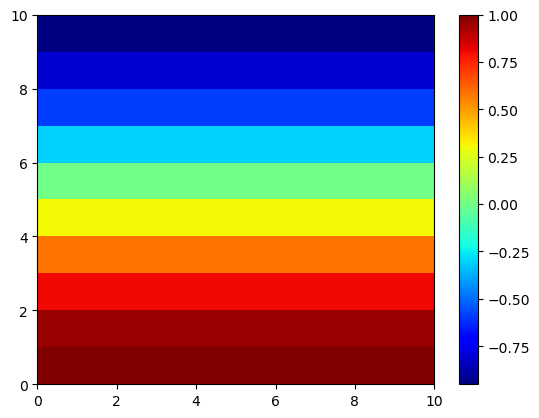

In [32]:
plt.pcolormesh(data[:, :, 2], cmap = "jet")
plt.colorbar()

In [33]:
tracer.get_time()

100.0

In [34]:
s = bytes('艾克你好',encoding='utf-8')
a = memoryview(s)
print(len(a))#字节长度
print(a[0])
print(a[1])
print(a[2])
print(bytes(a[0:]).decode('utf-8'))#切片后解码
a


12
232
137
190
艾克你好


In [35]:
del s

In [36]:
print(bytes(a[0:]).decode('utf-8'))#切片后解码

艾克你好


In [37]:
a